# **Demographic Analysis**
--------------------------
*Customers table only*

In [1]:
from EDA_snippets import *
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, quantile_transform
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN

In [2]:
customers = pd.read_csv("data/twm_customer.csv", delimiter=";")

### Customers

#### Prep

In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cust_id          747 non-null    int64 
 1   income           747 non-null    int64 
 2   age              747 non-null    int64 
 3   years_with_bank  747 non-null    int64 
 4   nbr_children     747 non-null    int64 
 5   gender           747 non-null    object
 6   marital_status   747 non-null    int64 
 7   name_prefix      747 non-null    object
 8   first_name       747 non-null    object
 9   last_name        747 non-null    object
 10  street_nbr       747 non-null    int64 
 11  street_name      747 non-null    object
 12  postal_code      747 non-null    int64 
 13  city_name        747 non-null    object
 14  state_code       747 non-null    object
dtypes: int64(8), object(7)
memory usage: 87.7+ KB


In [4]:
customers.head(10)
# zip codes? for location proximity information
# gender encoded in one column 0/1
# nbr/children maybe bin or reduce to have/not
# age can be binned as well (or polynomial transformation)
# marital status? dummy variables instead of ordinal

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY
5,1362813,15684,53,3,2,F,2,,Terry ...,Eubanks ...,6999,Begonia ...,60654,Chicago,IL
6,1363017,0,16,1,0,M,1,,Tim ...,McMillen ...,10274,Mission Gorge ...,90095,Los Angeles,CA
7,1362609,1929,79,8,0,F,2,,Sandy ...,Rayhanian ...,6168,Camellia ...,96846,Honolulu,HI
8,1363486,39942,41,1,5,F,4,,Jill ...,Campbell ...,3830,Tenth ...,96802,Honolulu,HI
9,1363078,9622,46,6,1,M,2,Mr.,Christopher ...,McVicker ...,14382,Peach ...,96822,Honolulu,HI


In [5]:
customers.cust_id.nunique() == customers.shape[0]

True

#### Data cleaning

In [6]:
customers.state_code.nunique()

33

In [7]:
regions = ["W", "MW", "S", "NE"]

state_to_region = {
    "NV": "W",
    "CA": "W",
    "NY": "NE",
    "IL": "MW",
    "HI": "W",
    "DC": "S",
    "TX": "S",
    "PA": "NE",
    "OR": "W",
    "OH": "MW",
    "WA": "W",
    "NJ": "NE",
    "IN": "MW",
    "CO": "W",
    "WI": "MW",
    "MI": "MW",
    "NB": "MW",
    "AZ": "W",
    "MN": "MW",
    "TN": "S",
    "VA": "S",
    "FL": "S",
    "MD": "S",
    "MO": "W",
    "LA": "S",
    "KY": "S",
    "OK": "S",
    "MA": "NE",
    "GA": "S",
    "KS": "MW",
    "NC": "S",
    "NM": "W",
    "AL": "S",
}

In [8]:
customers["region"] = customers["state_code"].apply(
    lambda x: state_to_region[x.strip()]
)

In [9]:
# convert gender to binary with 0=M and 1=F
customers["gender"] = customers["gender"].apply(
    lambda x: 0 if (x.strip().lower() == "m") else 1
)

In [10]:
customers["name_prefix"].value_counts()

            505
Ms.          92
Mr.          82
Mrs.         31
Dr.          22
Miss         15
Name: name_prefix, dtype: int64

In [11]:
customers["nbr_children"].value_counts()

0    466
1    114
2    110
3     38
5     10
4      9
Name: nbr_children, dtype: int64

<AxesSubplot:xlabel='nbr_children', ylabel='income'>

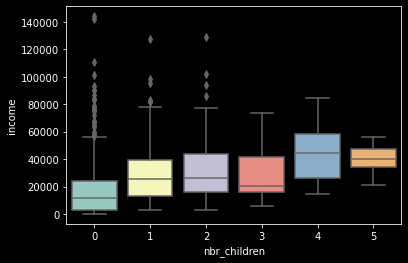

In [12]:
sns.boxplot(x=customers.nbr_children, y=customers.income)

In [13]:
kids = customers.nbr_children.apply(lambda x: 1 if (x >= 1) else 0)

<AxesSubplot:xlabel='nbr_children', ylabel='income'>

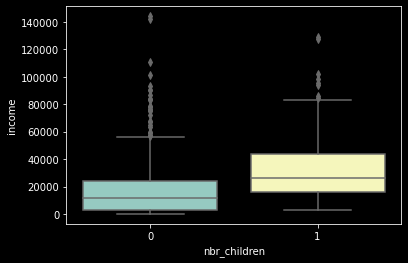

In [14]:
sns.boxplot(x=kids, y=customers.income)

In [15]:
customers["has_children"] = kids

<AxesSubplot:xlabel='marital_status', ylabel='income'>

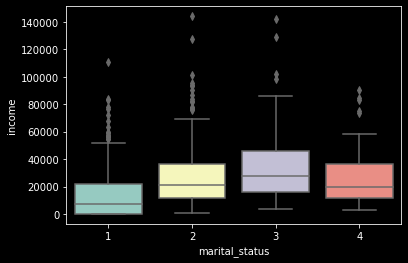

In [16]:
sns.boxplot(x=customers.marital_status, y=customers.income)

1 = single
2 = married
3/4 widowed/divorced?

In [17]:
customers.describe()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,street_nbr,postal_code,has_children
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,1.362991e+06,22728.281124,42.479250,3.907631,0.714859,0.559572,1.882195,8523.109772,59502.690763,0.376171
std,2.925255e+02,22207.221405,19.114879,2.675634,1.103410,0.496771,0.892051,5219.488263,31205.926508,0.484748
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,0.000000,1.000000,196.000000,2149.000000,0.000000
25%,1.362732e+06,7118.500000,28.000000,2.000000,0.000000,0.000000,1.000000,4295.500000,33145.000000,0.000000
50%,1.362993e+06,17242.000000,42.000000,4.000000,0.000000,1.000000,2.000000,8001.000000,64132.000000,0.000000
75%,1.363244e+06,31338.000000,56.000000,6.000000,1.000000,1.000000,2.000000,12039.000000,90082.000000,1.000000
max,1.363495e+06,144157.000000,89.000000,9.000000,5.000000,1.000000,4.000000,19940.000000,98186.000000,1.000000


In [18]:
customers = customers.drop(
    columns=[
        "name_prefix",
        "first_name",
        "last_name",
        "postal_code",
        "city_name",
        "state_code",
        "nbr_children",
        "street_name",
        "street_nbr",
    ]
)
customers.head()

,cust_id,income,age,years_with_bank,gender,marital_status,region,has_children
0,1362691,26150,46,5,0,2,W,1
1,1362487,6605,71,1,0,2,W,0
2,1363160,18548,38,8,1,1,W,0
3,1362752,47668,54,3,1,1,W,0
4,1362548,44554,59,9,1,4,NE,1


<AxesSubplot:xlabel='region', ylabel='income'>

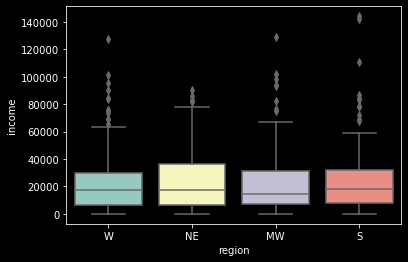

In [19]:
sns.boxplot(x=customers.region, y=customers.income)

In [20]:
regions = pd.get_dummies(customers["region"], drop_first=True)

In [21]:
type(regions)

pandas.core.frame.DataFrame

In [22]:
regions.head()

,NE,S,W
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0


In [23]:
regions.columns

Index(['NE', 'S', 'W'], dtype='object')

In [24]:
regions

,NE,S,W
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0
...,...,...,...
742,0,0,1
743,1,0,0
744,0,0,1
745,0,1,0


In [25]:
customers[regions.columns] = regions

In [26]:
customers = customers.drop(columns=["region"])

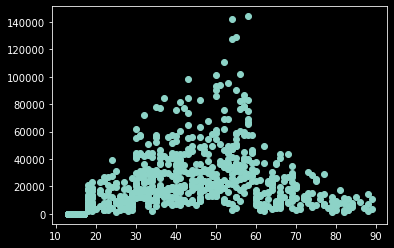

In [27]:
plt.scatter(x=customers.age, y=customers.income)

In [28]:
# All ages < 18 have no income
customers[customers["income"] == 0]["age"].value_counts()

15    32
17    21
16    19
13    15
14    15
Name: age, dtype: int64

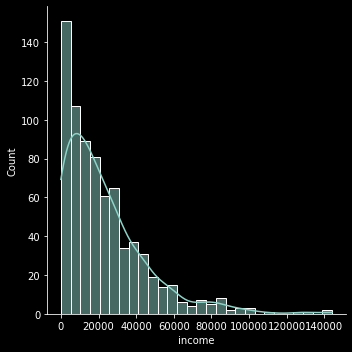

In [29]:
sns.displot(customers["income"], kde=True)

M:\Anaconda\envs\LHL\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


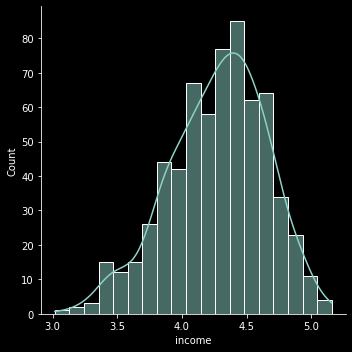

In [30]:
sns.displot(np.log10(customers["income"]), kde=True)

#### Data transformation

In [31]:
# impute median income for young teens
# customers['income'] = customers['income'].apply(lambda x: customers['income'].median() if (x == 0) else x)

In [32]:
customers["log10_income"] = np.log10(customers.income)

M:\Anaconda\envs\LHL\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [33]:
customers["log10_income"].value_counts()

-inf         102
 4.098990      2
 3.905148      2
 4.081779      2
 4.386820      2
            ... 
 4.559152      1
 4.695683      1
 5.111249      1
 4.598823      1
 4.252246      1
Name: log10_income, Length: 640, dtype: int64

In [34]:
row_selector = np.isneginf(
    customers["log10_income"]
)  # setup row selection to replace -inf with 0.
customers.loc[row_selector, "log10_income"] = 0

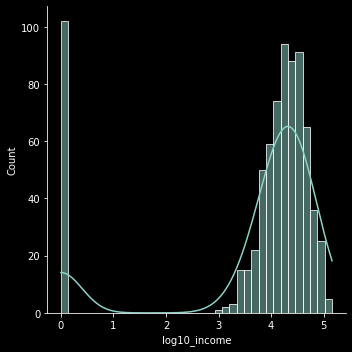

In [35]:
sns.displot(customers["log10_income"], kde=True)

In [36]:
customers[customers.income == 0].income.value_counts() / customers.shape[0]

0    0.136546
Name: income, dtype: float64

In [37]:
customers.head()

,cust_id,income,age,years_with_bank,gender,marital_status,has_children,NE,S,W,log10_income
0,1362691,26150,46,5,0,2,1,0,0,1,4.417472
1,1362487,6605,71,1,0,2,0,0,0,1,3.819873
2,1363160,18548,38,8,1,1,0,0,0,1,4.268297
3,1362752,47668,54,3,1,1,0,0,0,1,4.678227
4,1362548,44554,59,9,1,4,1,1,0,0,4.648887


(747, 11)

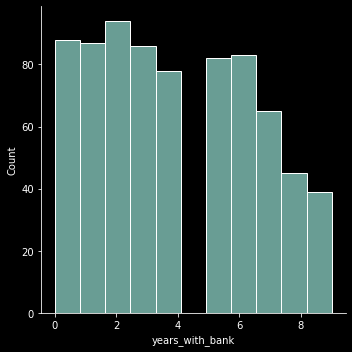

In [38]:
sns.displot(customers["years_with_bank"])
customers.shape

In [39]:
customers.age.describe()

count    747.000000
mean      42.479250
std       19.114879
min       13.000000
25%       28.000000
50%       42.000000
75%       56.000000
max       89.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Count'>

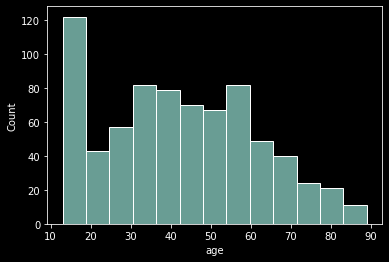

In [40]:
sns.histplot(customers.age)

In [41]:
poly_test = customers.copy()  # copy a frame to use in the poly section.

ages  
13-17  
18-25  
25-30 NOTE  
30-40  
40-50  
50-60  
60-75  
75+  

In [42]:
model_customers = customers.drop(columns=["cust_id", "income"])
quantile_test = model_customers.copy()

#### Poly exp on income and age

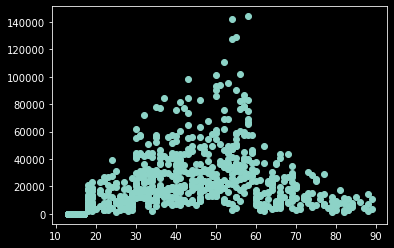

In [ ]:
plt.scatter(x=customers.age, y=customers.income)

In [ ]:
poly = PolynomialFeatures(2)

In [ ]:
poly_income_age = poly.fit_transform(customers[["income", "age"]])

In [ ]:
poly_income_age = pd.DataFrame(poly_income_age)

In [ ]:
poly_income_age

,0,1,2,3,4,5
0,1.0,26150.0,46.0,6.838225e+08,1202900.0,2116.0
1,1.0,6605.0,71.0,4.362602e+07,468955.0,5041.0
2,1.0,18548.0,38.0,3.440283e+08,704824.0,1444.0
3,1.0,47668.0,54.0,2.272238e+09,2574072.0,2916.0
4,1.0,44554.0,59.0,1.985059e+09,2628686.0,3481.0
...,...,...,...,...,...,...
742,1.0,14795.0,36.0,2.188920e+08,532620.0,1296.0
743,1.0,26387.0,56.0,6.962738e+08,1477672.0,3136.0
744,1.0,61300.0,50.0,3.757690e+09,3065000.0,2500.0
745,1.0,15100.0,37.0,2.280100e+08,558700.0,1369.0


#### Quantile Rank Normalization

In [43]:
normalized_observations = quantile_transform(
    quantile_test[["age", "years_with_bank", "log10_income"]],
    n_quantiles=75,
    output_distribution="normal",
)

In [44]:
normalized_observations

array([[ 0.17018472,  0.32756149,  0.42043618],
       [ 1.42848207, -0.93197131, -0.71022025],
       [-0.17018472,  1.39783653,  0.07715672],
       ...,
       [ 0.34548507, -5.19933758,  1.56504432],
       [-0.21641028,  1.01352217, -0.10859268],
       [-1.01352217, -0.20465992,  0.03372296]])

In [45]:
quantile_test[["age", "years_with_bank", "log10_income"]] = normalized_observations
quantile_test.head()

,age,years_with_bank,gender,marital_status,has_children,NE,S,W,log10_income
0,0.170185,0.327561,0,2,1,0,0,1,0.420436
1,1.428482,-0.931971,0,2,0,0,0,1,-0.710220
2,-0.170185,1.397837,1,1,0,0,0,1,0.077157
3,0.532190,-0.204660,1,1,0,0,0,1,1.202177
4,0.832006,5.199338,1,4,1,1,0,0,1.113112


#### Standard Scaling

In [46]:
std_scalar = StandardScaler()
scaled_customers = std_scalar.fit_transform(model_customers)
scaled_quantiles = std_scalar.fit_transform(quantile_test)

In [47]:
std_customers = pd.DataFrame(scaled_customers, columns=model_customers.columns)
std_quantiles = pd.DataFrame(scaled_quantiles, columns=quantile_test.columns)

In [48]:
std_customers.head()

,age,years_with_bank,gender,marital_status,has_children,NE,S,W,log10_income
0,0.184312,0.408539,-1.127172,0.132149,1.287774,-0.49707,-0.569621,1.298865,0.480869
1,1.493070,-1.087435,-1.127172,0.132149,-0.776534,-0.49707,-0.569621,1.298865,0.084871
2,-0.234490,1.530520,0.887176,-0.989614,-0.776534,-0.49707,-0.569621,1.298865,0.382019
3,0.603115,-0.339448,0.887176,-0.989614,-0.776534,-0.49707,-0.569621,1.298865,0.653658
4,0.864867,1.904514,0.887176,2.375675,1.287774,2.01179,-0.569621,-0.769903,0.634216


In [49]:
std_quantiles.head()

,age,years_with_bank,gender,marital_status,has_children,NE,S,W,log10_income
0,0.181310,0.259610,-1.127172,0.132149,1.287774,-0.49707,-0.569621,1.298865,0.448909
1,1.219756,-0.306787,-1.127172,0.132149,-0.776534,-0.49707,-0.569621,1.298865,-0.109650
2,-0.099589,0.740899,0.887176,-0.989614,-0.776534,-0.49707,-0.569621,1.298865,0.279324
3,0.480065,0.020276,0.887176,-0.989614,-0.776534,-0.49707,-0.569621,1.298865,0.835100
4,0.727497,2.450387,0.887176,2.375675,1.287774,2.01179,-0.569621,-0.769903,0.791100


In [50]:
# test_std = std_customers.drop(columns=['NE', 'S', 'W'])

In [51]:
# Testing without location data.
# test_std.head()

#### PCA

In [52]:
pca_transform = PCA(n_components=9)
pca_customers = pca_transform.fit_transform(std_customers)

In [53]:
quantiles_pca_transform = PCA(n_components=2)
pca_quantiles = quantiles_pca_transform.fit_transform(std_quantiles)

In [54]:
# test_transform = PCA(n_components=2)
# pca_test = test_transform.fit_transform(test_std)

In [55]:
pca_df = pd.DataFrame(
    pca_customers,
    columns=[f"PC{integer}" for integer in range(1, len(std_customers.columns) + 1)],
)
quantiles_pca_df = pd.DataFrame(pca_quantiles, columns=["PC1", "PC2"])

In [56]:
pca_df.shape

(747, 9)

In [57]:
quantiles_pca_df.head()

,PC1,PC2
0,-0.859727,1.573032
1,-0.121732,0.969372
2,0.875901,1.113309
3,0.319683,1.028597
4,-2.671771,-0.359303


Text(0, 0.5, '(16.65% Variation Explained)\nPC2')

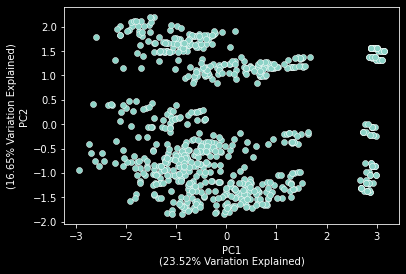

In [58]:
sns.scatterplot(x=pca_df.PC1, y=pca_df.PC2)
plt.xlabel(
    f"PC1\n({pca_transform.explained_variance_ratio_[0] * 100:.2f}% Variation Explained)"
)
plt.ylabel(
    f"({pca_transform.explained_variance_ratio_[1] * 100:.2f}% Variation Explained)\nPC2"
)

Text(0, 0.5, 'Variation Explained')

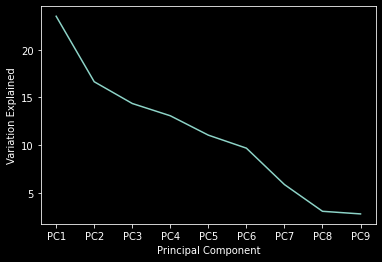

In [59]:
sns.lineplot(x=pca_df.columns, y=(pca_transform.explained_variance_ratio_ * 100))

plt.xlabel("Principal Component")
plt.ylabel("Variation Explained")

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

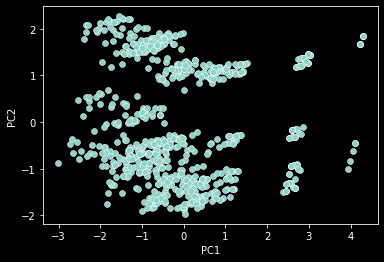

In [60]:
sns.scatterplot(x=quantiles_pca_df.PC1, y=quantiles_pca_df.PC2)

In [61]:
quantiles_pca_transform.explained_variance_ratio_

array([0.23936571, 0.16711622])

In [62]:
# sns.scatterplot(x=pca_test[:, 0], y=pca_test[:, 1])

#### Clustering (PCA results)

##### k-means

M:\Anaconda\envs\LHL\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


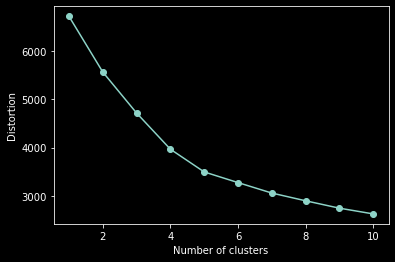

In [63]:
# Elbow rule suggests 3 clusters.


def plot_distortion(X, max_clusters=10):
    distortions = []
    for i in range(1, max_clusters + 1):
        km = KMeans(n_clusters=i, init="k-means++", n_init=10, random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1, max_clusters + 1), distortions, marker="o")
    plt.xlabel("Number of clusters")
    plt.ylabel("Distortion")
    plt.show()


plot_distortion(pca_customers, max_clusters=10)

In [64]:
kmeans = KMeans(n_clusters=5, n_init=50)

In [65]:
y_kmeans = kmeans.fit_predict(pca_customers)

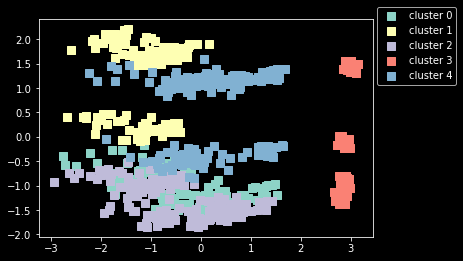

In [66]:
def plot_clusters(X, y_res, plt_cluster_centers=False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster, 0]
        y = X[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x, y, s=50, marker="s", label=f"cluster {cluster}")

    if plt_cluster_centers:
        plt.scatter(
            X_centroids, Y_centroids, marker="*", c="red", s=250, label="centroids"
        )
    plt.legend(loc=(1.01, 0.7))
    plt.show()


plot_clusters(pca_customers, y_kmeans)

##### DBSCAN

In [67]:
cust_db = DBSCAN()  # default params to start with

In [68]:
y_db = cust_db.fit_predict(pca_customers[:, 0:2])

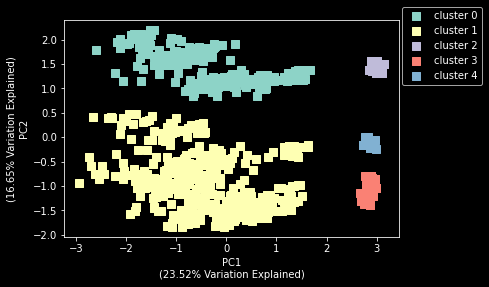

In [69]:
plt.xlabel(
    f"PC1\n({pca_transform.explained_variance_ratio_[0] * 100:.2f}% Variation Explained)"
)
plt.ylabel(
    f"({pca_transform.explained_variance_ratio_[1] * 100:.2f}% Variation Explained)\nPC2"
)
plot_clusters(pca_customers[:, 0:2], y_db)

#### Clustering (Standardized data)

M:\Anaconda\envs\LHL\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


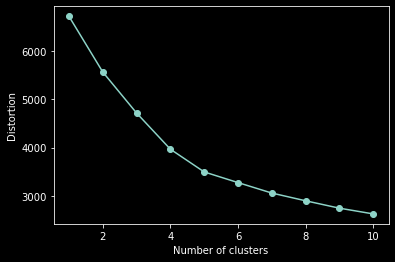

In [70]:
plot_distortion(std_customers, max_clusters=10)

In [71]:
std_customers_kmeans = KMeans(n_clusters=5, n_init=100)

In [72]:
y_std_cust_kmeans = std_customers_kmeans.fit_predict(std_customers)

In [73]:
std_customers.head()

,age,years_with_bank,gender,marital_status,has_children,NE,S,W,log10_income
0,0.184312,0.408539,-1.127172,0.132149,1.287774,-0.49707,-0.569621,1.298865,0.480869
1,1.493070,-1.087435,-1.127172,0.132149,-0.776534,-0.49707,-0.569621,1.298865,0.084871
2,-0.234490,1.530520,0.887176,-0.989614,-0.776534,-0.49707,-0.569621,1.298865,0.382019
3,0.603115,-0.339448,0.887176,-0.989614,-0.776534,-0.49707,-0.569621,1.298865,0.653658
4,0.864867,1.904514,0.887176,2.375675,1.287774,2.01179,-0.569621,-0.769903,0.634216


In [74]:
df_scaled_customers_test = pd.read_csv("data/V1_std_customers.csv")

### Radar plots

In [75]:
def radar_plot_clusters(X, y_res):
    """
    Captures the mean and median for each feature seperately for each cluster and graphs a radar plot figure
    with 2 panels for each cluster (1 for mean and 1 for median).
    """
    figures = {}  # key is plot name, value is pandas DataFrame.

    for cluster in set(y_res):
        _cluster_df = {}

        for column in X.columns:
            # These work because the row indices of y_res are expected to match those of X.
            _feature_mean_median = pd.Series(
                {
                    "mean": X.loc[y_res == cluster, column].mean(),
                    "median": X.loc[y_res == cluster, column].median(),
                }
            )

            _cluster_df[column] = _feature_mean_median

        figures[f"Cluster {cluster}"] = pd.DataFrame(_cluster_df)

    # print(figures['Cluster 1'].values)
    make_radar_plot_figures(figures)

In [76]:
def plot_radar_figure(title: str, figure: pd.DataFrame) -> None:

    fig = px.line_polar(
        data_frame=figure,
        r=figure.values[1],
        theta=figure.columns,
        line_close=True,
        template="plotly_dark",
        range_r=(-3, 2),
        title=title,
    )
    fig.show()

In [77]:
def make_radar_plot_figures(figures: dict[pd.DataFrame]) -> None:
    for title, figure in figures.items():
        plot_radar_figure(title, figure)

In [78]:
radar_plot_clusters(std_customers, y_std_cust_kmeans)

In [79]:
radar_plot_clusters(std_customers, y_std_cust_kmeans)